In [1]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

#한글 데이터를 위한 처리
font_name = font_manager.FontProperties(fname=r"C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

drive_path = r'C:/Users/kyung/Desktop/data_visu/covid_dataset/'

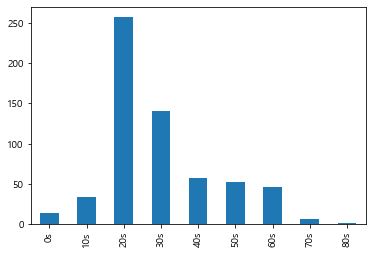

In [2]:
# 데이터 로드 -> 4004 row
patient_info = pd.read_csv(drive_path + 'PatientInfo.csv')

# 결측치 제거 -> 2758 row
patient_info.dropna(axis=0, subset=['infection_case', 'age'], inplace = True)

# infection_case = overseas inflow 만 남기기  -> 610 row
patient_info = patient_info[patient_info.infection_case == 'overseas inflow']

#연령별로 나누기
patient_info = patient_info.age

#연령별 합 구하고 인덱스로 정렬
counts = patient_info.value_counts().sort_index()
counts.plot.bar()
plt.show()

In [3]:
values = np.array(counts)
    # print(values) -> [ 14  34 257 141  58  53  46   6   1]

#### 혹시 몰라서 구한 값 : 전체합, 비율
#전체합 -> 610개
# values_total = patient_info.value_counts().sum()

#비율 구하기
# ratio = np.divide(values, values_total).round(5)
    # print(ratio) -> [0.02295 0.05574 0.42131 0.23115 0.09508 0.08689 0.07541 0.00984 0.001640]

    

#인덱스 라벨링
labels = patient_info.value_counts().sort_index().index
labels = np.array(labels)
    # print(labels) -> ['0s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s']
    
# 20대 떼어내기
explodes = [0, 0, 0.1, 0, 0, 0, 0, 0, 0]

#파이차트 색 -> 좀더 구분 잘 되는 색으로 바꿔야한다. 
colors = ['#00876c','#53a473','#d43d51','#c4db88','#fff49a','#fbc973','#f49d5a','#e86f50','#8bc07c']

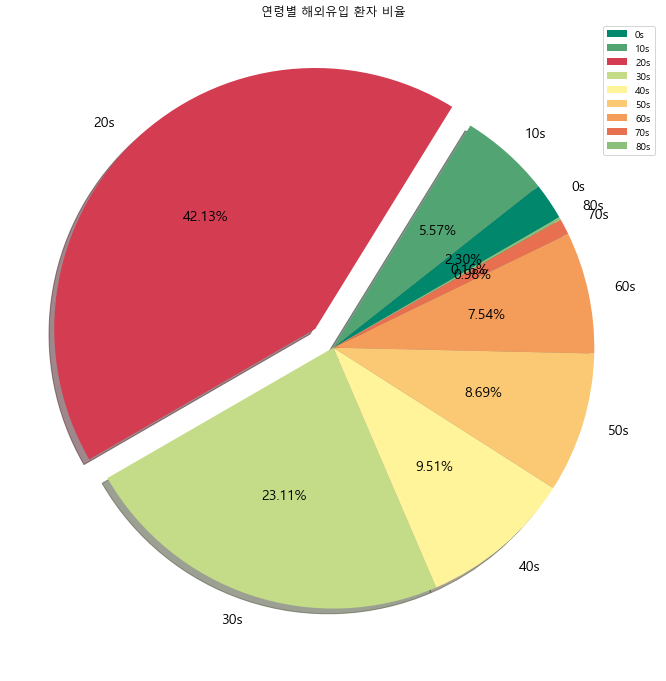

In [4]:
# pie chart 
plt.figure(figsize = (12,12))
plt.pie(values, explode = explodes, labels = labels,
        colors = colors, startangle = 30, shadow = True,
        autopct = '%1.2f%%', textprops = {'fontsize':14})
plt.legend()
plt.title('연령별 해외유입 환자 비율')
plt.show()